# 11.3 梯度下降
- **目录**
  - 11.3.1 一维梯度下降
    - 11.3.1.1 学习率
    - 11.3.1.2 局部最小值
  - 11.3.2 多元梯度下降
  - 11.3.3 自适应方法
    - 11.3.3.1 牛顿法
    - 11.3.3.2 收敛性分析
    - 11.3.3.3 预处理
    - 11.3.3.4 梯度下降和线搜索

- 尽管**梯度下降（gradient descent）** 很少直接用于深度学习，
但了解它是理解下一节随机梯度下降算法的关键。
  - 例如，**由于学习率过大，优化问题可能会发散** ，这种现象早已在梯度下降中出现。
- 同样地，**预处理（preconditioning）** 是梯度下降中的一种常用技术，
还被沿用到更高级的算法中。
让我们从简单的一维梯度下降开始。

## 11.3.1 一维梯度下降
- 一维中的梯度下降给我们很好的启发。
- 考虑一类连续可微实值函数$f: \mathbb{R} \rightarrow \mathbb{R}$，
利用泰勒展开，我们可以得到
$$f(x + \epsilon) = f(x) + \epsilon f'(x) + \mathcal{O}(\epsilon^2) \tag{11.3.1}$$
即在一阶近似中，$f(x+\epsilon)$可通过$x$处的函数值$f(x)$和一阶导数$f'(x)$得出。
- 可以假设在负梯度方向上移动的$\epsilon$会减少$f$。
- 为了简单起见，我们选择固定步长$\eta > 0$，然后取$\epsilon = -\eta f'(x)$。
  - 将其代入泰勒展开式我们可以得到
$$f(x - \eta f'(x)) = f(x) - \eta f'^2(x) + \mathcal{O}(\eta^2 f'^2(x)) \tag{11.3.2}$$
如果其导数$f'(x) \neq 0$没有消失，我们就能继续展开，这是因为$\eta f'^2(x)>0$。
- 此外，可以令$\eta$小到足以使高阶项变得不相关。
- 因此，$$f(x - \eta f'(x)) \lessapprox f(x)  \tag{11.3.3}$$
- 这意味着，如果使用
$$x \leftarrow x - \eta f'(x)  \tag{11.3.4}$$
来迭代$x$，函数$f(x)$的值可能会下降。
- 因此，在梯度下降中，首先选择初始值$x$和常数$\eta > 0$，
然后使用它们连续迭代$x$，直到停止条件达成。
  - 例如，当梯度$|f'(x)|$的幅度足够小或迭代次数达到某个值时。
- 下面我们来展示如何实现梯度下降。为了简单起见，我们选用目标函数$f(x)=x^2$。
  - 尽管我们知道$x=0$时$f(x)$能取得最小值，但我们仍然使用这个简单的函数来观察$x$的变化。

- **要点：**
  - **目的**：梯度下降算法的目的是优化（通常是最小化）一个目标函数。
  - **泰勒展开式**：通过泰勒展开式，可以近似地表示函数在$x$附近的值，这是由公式11.3.1给出的。
  - **选择方向**：梯度的方向指出了函数增加最快的方向，因此，为了减少函数的值，可在负梯度方向上移动。
  - **步长选择**：梯度下降需要选择一个固定步长$\eta$，这决定了每次迭代时$x$更新的幅度。将步长与梯度结合，我们可以得到式 \(11.3.2\)，这展示了向负梯度方向移动将如何减少函数值。
  - **更新规则**：在每一次迭代中，我们根据公式11.3.4更新$x$，这将减少$f(x)$的值。
  - **停止条件**：梯度下降会持续进行，直到满足某个停止条件，如梯度的大小足够小，或迭代次数达到一个预设的值。

-------------
- **说明：公式11.3.1中的$\mathcal{O}(\epsilon^2)$是何意？**
  - 在数学和计算机科学中，符号 $\mathcal{O}(\cdot)$ 代表一个“大O”记号，它描述了一个函数随着输入变化的增长率或复杂性。
  - 在公式 11.3.1 的上下文中，$\mathcal{O}(\epsilon^2)$表示泰勒展开的高阶项，它的大小和$\epsilon^2$ 或更高阶的幂成正比。
  - 具体来说，当我们说 $$f(x + \epsilon) = f(x) + \epsilon f'(x) + \mathcal{O}(\epsilon^2)$$
  - 即：当 $\epsilon$ 接近0时，$\mathcal{O}(\epsilon^2)$ 中的项相对于 $\epsilon f'(x)$ 的贡献是可以忽略的。换句话说，随着 $\epsilon$的减小，$\epsilon^2$（和更高阶的幂）的贡献会比 $\epsilon$ 更快地趋于零。
  - 在此上下文中，$\mathcal{O}(\epsilon^2)$ 可以被视为一种简化，它允许我们只考虑函数的一阶泰勒展开，而忽略更复杂的高阶项。
    - **这种近似在 $\epsilon$ 很小的时候是合理的，因为高阶项的影响会变得微不足道**。

-----------

- **示例**：
  - 使用函数$f(x) = x^2$作为一个例子来演示梯度下降。
  - 这是一个简单的函数，知道它的最小值在$x = 0$处，但它是一个很好的例子来观察$x$如何随迭代而变化。

In [22]:
%matplotlib inline
import numpy as np
import torch
from d2l import torch as d2l

In [23]:
def f(x):  # 目标函数
    return x ** 2

def f_grad(x):  # 目标函数的梯度(导数)
    return 2 * x

- 接下来使用$x=10$作为初始值，并假设$\eta=0.2$。
- 使用梯度下降法迭代$x$共10次，可以看到$x$的值最终将接近最优解。


In [24]:
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    print(f'epoch 10, x: {x:f}')
    return results

results = gd(0.2, f_grad)

epoch 10, x: 0.060466


- 对进行$x$优化的过程可以绘制如下。


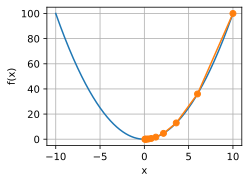

In [26]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    d2l.set_figsize()
    d2l.plot([f_line, results], [[f(x) for x in f_line], [
        f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o'])

show_trace(results, f)

### 11.3.1.1 学习率


- **学习率（learning rate）**决定目标函数**能否收敛到局部最小值，以及何时收敛到最小值**。
- 学习率$\eta$可由算法设计者设置。
- 请注意，如果使用的学习率太小，将导致$x$的更新非常缓慢，需要更多的迭代。
  - 例如，考虑同一优化问题中$\eta = 0.05$的进度。
  - 如下所示，尽管经过了10个步骤，我们仍然离最优解很远。


epoch 10, x: 3.486784


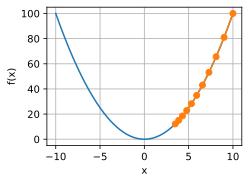

In [27]:
show_trace(gd(0.05, f_grad), f)

- 相反，如果我们使用过高的学习率， $\left|\eta f'(x)\right|$对于一阶泰勒展开式可能太大。
- 也就是说，公式11.3.1中的$\mathcal{O}(\eta^2 f'^2(x))$可能变得显著了。
- 在这种情况下，$x$的迭代不能保证降低$f(x)$的值。
  - 例如，当学习率为$\eta=1.1$时，$x$超出了最优解$x=0$并逐渐发散。


epoch 10, x: 61.917364


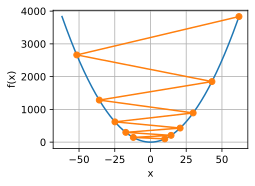

In [28]:
show_trace(gd(1.1, f_grad), f)

### 11.3.1.2 局部最小值

- 为了演示非凸函数的梯度下降，考虑函数$f(x) = x \cdot \cos(cx)$，其中$c$为某常数。
  - 这个函数有无穷多个局部最小值。
- 根据选择的学习率，最终可能只会得到许多解的一个。
- 下面的例子说明了 **（不切实际的）高学习率如何导致较差的局部最小值** 。


epoch 10, x: -1.528166


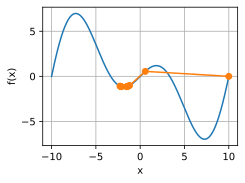

In [29]:
c = torch.tensor(0.15 * np.pi)

def f(x):  # 目标函数
    return x * torch.cos(c * x)

def f_grad(x):  # 目标函数的梯度
    return torch.cos(c * x) - c * x * torch.sin(c * x)

show_trace(gd(2, f_grad), f)

## 11.3.2 多元梯度下降

- 现在考虑一下$\mathbf{x} = [x_1, x_2, \ldots, x_d]^\top$的情况。
  - 即目标函数$f: \mathbb{R}^d \to \mathbb{R}$将向量映射成标量。
- 相应地，它的梯度也是多元的：它是一个由$d$个偏导数组成的向量：
$$\nabla f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_d}\bigg]^\top \tag{11.3.5}$$
  - 梯度中的每个偏导数元素$\partial f(\mathbf{x})/\partial x_i$代表了当输入$x_i$时$f$在$\mathbf{x}$处的变化率。
  - 和先前单变量的情况一样，我们可以对多变量函数使用相应的泰勒近似来思考。
  - 具体来说，
$$f(\mathbf{x} + \boldsymbol{\epsilon}) = f(\mathbf{x}) + \mathbf{\boldsymbol{\epsilon}}^\top \nabla f(\mathbf{x}) + \mathcal{O}(\|\boldsymbol{\epsilon}\|^2) \tag{11.3.6}$$
  - 换句话说，在$\boldsymbol{\epsilon}$的二阶项中，
最陡下降的方向由负梯度$-\nabla f(\mathbf{x})$得出。
- 选择合适的学习率$\eta > 0$来生成典型的梯度下降算法：
$$\mathbf{x} \leftarrow \mathbf{x} - \eta \nabla f(\mathbf{x})\tag{11.3.7}$$
这个算法在实践中的表现如何呢？
- 我们构造一个目标函数$f(\mathbf{x})=x_1^2+2x_2^2$，
并有二维向量$\mathbf{x} = [x_1, x_2]^\top$作为输入，
标量作为输出。
- 梯度由$\nabla f(\mathbf{x}) = [2x_1, 4x_2]^\top$给出。
- 我们将从初始位置$[-5, -2]$通过梯度下降观察$\mathbf{x}$的轨迹。
- 还需要两个辅助函数：
  - 第一个是update函数，并将其应用于初始值20次；
  - 第二个函数会显示$\mathbf{x}$的轨迹。


In [30]:
def train_2d(trainer, steps=20, f_grad=None):  #@save
    """用定制的训练机优化2D目标函数"""
    # s1和s2是稍后将使用的内部状态变量
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def show_trace_2d(f, results):  #@save
    """显示优化过程中2D变量的轨迹"""
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1),
                          torch.arange(-3.0, 1.0, 0.1),  indexing='ij')
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

- 接下来，我们观察学习率$\eta = 0.1$时优化变量$\mathbf{x}$的轨迹。
- 可以看到，经过20步之后，$\mathbf{x}$的值接近其位于$[0, 0]$的最小值。
- 虽然进展相当顺利，但相当缓慢。


epoch 20, x1: -0.057646, x2: -0.000073


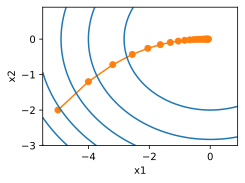

In [31]:
def f_2d(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):  # 目标函数的梯度
    return (2 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

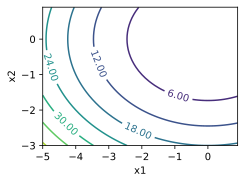

In [32]:
## 等高线与网格数据的简单示例
import matplotlib.pyplot as plt
m = torch.meshgrid(torch.arange(-5,1,0.1),torch.arange(-3,1,0.1),indexing='ij')
contour = plt.contour(m[0],m[1],m[0]**2+2*m[1]**2)
plt.clabel(contour, inline=True, fontsize=10, fmt="%.2f")
plt.xlabel('x1')
plt.ylabel('x2')
#plt.xlim(-5.5,0.2)
plt.show()

In [33]:
# 网格数据
m

(tensor([[-5.0000, -5.0000, -5.0000,  ..., -5.0000, -5.0000, -5.0000],
         [-4.9000, -4.9000, -4.9000,  ..., -4.9000, -4.9000, -4.9000],
         [-4.8000, -4.8000, -4.8000,  ..., -4.8000, -4.8000, -4.8000],
         ...,
         [ 0.7000,  0.7000,  0.7000,  ...,  0.7000,  0.7000,  0.7000],
         [ 0.8000,  0.8000,  0.8000,  ...,  0.8000,  0.8000,  0.8000],
         [ 0.9000,  0.9000,  0.9000,  ...,  0.9000,  0.9000,  0.9000]]),
 tensor([[-3.0000, -2.9000, -2.8000,  ...,  0.7000,  0.8000,  0.9000],
         [-3.0000, -2.9000, -2.8000,  ...,  0.7000,  0.8000,  0.9000],
         [-3.0000, -2.9000, -2.8000,  ...,  0.7000,  0.8000,  0.9000],
         ...,
         [-3.0000, -2.9000, -2.8000,  ...,  0.7000,  0.8000,  0.9000],
         [-3.0000, -2.9000, -2.8000,  ...,  0.7000,  0.8000,  0.9000],
         [-3.0000, -2.9000, -2.8000,  ...,  0.7000,  0.8000,  0.9000]]))

## 11.3.3 自适应方法

- 正如在 11.3.1.1节中所看到的，**选择“恰到好处”的学习率$\eta$是很棘手**的。
- 如果把它选得太小，就没有什么进展；如果太大，得到的解就会**振荡**，甚至可能**发散**。
- 如果可以**自动确定$\eta$，** 或者完全不必选择学习率，会怎么样？
- 除了考虑目标函数的值和梯度，还考虑它的**曲率的二阶方法**有助于解决这个问题。
- 虽然由于计算代价的原因，这些方法不能直接应用于深度学习，但它们为如何设计高级优化算法提供了有用的思维直觉，这些算法可以模拟下面概述的算法的许多理想特性。

-----
- **说明：Hessian 矩阵的定义**
  - Hessian 矩阵是函数 $f(\mathbf{x})$ 关于自变量 $\mathbf{x} = [x_1, x_2, \dots, x_d]^\top$ 的二阶偏导数组成的矩阵。
  - 其定义为：
  $$
\mathbf{H} = \nabla^2 f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_d} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_d} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_d \partial x_1} & \frac{\partial^2 f}{\partial x_d \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_d^2}
\end{bmatrix}.
  $$
    - 其中：
      - $\frac{\partial^2 f}{\partial x_i^2}$ 是 $f$ 关于变量 $x_i$ 的二阶偏导；
      - $\frac{\partial^2 f}{\partial x_i \partial x_j}$ 是 $f$ 关于 $x_i$ 和 $x_j$ 的混合偏导。
   
  - 考虑函数：
    $$
    f(x_1, x_2) = x_1^2 + 2x_1x_2 + 3x_2^2.
    $$

   - 计算梯度：
     $$
   \nabla f = \begin{bmatrix}
   \frac{\partial f}{\partial x_1} \\
   \frac{\partial f}{\partial x_2}
   \end{bmatrix}
   = \begin{bmatrix}
   2x_1 + 2x_2 \\
   2x_1 + 6x_2
   \end{bmatrix}.
     $$
    - 计算 Hessian 矩阵：
      $$
   \mathbf{H} = \nabla^2 f = \begin{bmatrix}
   \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} \\
   \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2}
   \end{bmatrix}.
      $$
      - $\frac{\partial^2 f}{\partial x_1^2} = 2$,
      - $\frac{\partial^2 f}{\partial x_1 \partial x_2} = 2$,
      - $\frac{\partial^2 f}{\partial x_2 \partial x_1} = 2$,
      - $\frac{\partial^2 f}{\partial x_2^2} = 6$.
      -  最后得出Hessian矩阵：
     $$
     \mathbf{H} = \begin{bmatrix}
     2 & 2 \\
      2 & 6
     \end{bmatrix}.
     $$
   
----

### 11.3.3.1 牛顿法

- 回顾一些函数$f: \mathbb{R}^d \rightarrow \mathbb{R}$的泰勒展开式，事实上可以把它写成
$$f(\mathbf{x} + \boldsymbol{\epsilon}) = f(\mathbf{x}) + \boldsymbol{\epsilon}^\top \nabla f(\mathbf{x}) + \frac{1}{2} \boldsymbol{\epsilon}^\top \nabla^2 f(\mathbf{x}) \boldsymbol{\epsilon} + \mathcal{O}(\|\boldsymbol{\epsilon}\|^3) \tag{11.3.8}$$

- 为了避免繁琐的符号，我们将$\mathbf{H} \stackrel{\mathrm{def}}{=} \nabla^2 f(\mathbf{x})$定义为$f$的Hessian，是$d \times d$矩阵。

  - 当$d$的值很小且问题很简单时，$\mathbf{H}$很容易计算。
  
  - 但是对于深度神经网络而言，考虑到$\mathbf{H}$可能非常大，$\mathcal{O}(d^2)$个条目的存储代价会很高，此外通过反向传播进行计算可能雪上加霜。

- 然而，我们姑且先忽略这些考量，看看会得到什么算法。

- 毕竟，$f$的最小值满足$\nabla f = 0$。

- 遵循2.4节中的微积分规则，通过取$\boldsymbol{\epsilon}$对公式11.3.8的导数，再忽略不重要的高阶项，我们便得到
$$\nabla f(\mathbf{x}) + \mathbf{H} \boldsymbol{\epsilon} = 0 \text{ and hence }
\boldsymbol{\epsilon} = -\mathbf{H}^{-1} \nabla f(\mathbf{x}) \tag{11.3.9}$$

- 也就是说，作为优化问题的一部分，我们需要将Hessian矩阵$\mathbf{H}$求逆。

- 举一个简单的例子，对于$f(x) = \frac{1}{2} x^2$，有$\nabla f(x) = x$和$\mathbf{H} = 1$。

  - 因此，对于任何$x$，我们可以获得$\epsilon = -x$。
  
  - 换言之，单单一步就足以完美地收敛，而无须任何调整。
  
- 在这里比较幸运：泰勒展开式是确切的，因为$f(x+\epsilon)= \frac{1}{2} x^2 + \epsilon x + \frac{1}{2} \epsilon^2$。

- 让我们看看其他问题：
  - 给定一个凸双曲余弦函数$c$，其中$c$为某些常数，可以看到经过几次迭代后，得到了$x=0$处的全局最小值。

epoch 10, x: tensor(0.)


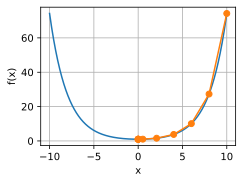

In [34]:
c = torch.tensor(0.5)

def f(x):  # O目标函数
    return torch.cosh(c * x)

def f_grad(x):  # 目标函数的梯度
    return c * torch.sinh(c * x)

def f_hess(x):  # 目标函数的Hessian
    return c**2 * torch.cosh(c * x)

def newton(eta=1):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x) / f_hess(x)
        results.append(float(x))
    print('epoch 10, x:', x)
    return results

show_trace(newton(), f)

- 现在考虑一个非凸函数，比如$f(x) = x \cos(c x)$，$c$为某些常数。
- 请注意在牛顿法中，最终将除以Hessian。
- 这意味着如果二阶导数是负的，$f$的值可能会趋于增加。
  - 此现象是这个算法的致命缺陷！
- 让我们看看实践中会发生什么。


epoch 10, x: tensor(26.8341)


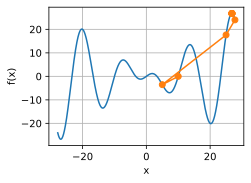

In [35]:
c = torch.tensor(0.15 * np.pi)

def f(x):  # 目标函数
    return x * torch.cos(c * x)

def f_grad(x):  # 目标函数的梯度
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):  # 目标函数的Hessian
    return - 2 * c * torch.sin(c * x) - x * c**2 * torch.cos(c * x)

show_trace(newton(), f)

- 这发生了惊人的错误。我们怎样才能修正它？
  - 一种方法是用取**Hessian的绝对值来修正**。
  - 另一个策略是**重新引入学习率**。
- 这似乎违背了初衷，但不完全是——拥有二阶信息可以使我们在曲率较大时保持谨慎，而**在目标函数较平坦时则采用较大的学习率** 。
- 让我们看看在学习率稍小的情况下它是如何生效的，比如$\eta = 0.5$。
- 如我们所见，我们有了一个相当高效的算法。


epoch 10, x: tensor(7.2699)


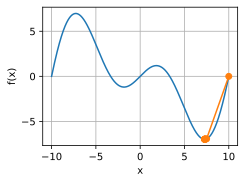

In [36]:
show_trace(newton(0.5), f)

------------
- **说明：**
- **（1）公式11.3.8各部分说明**
  - 常数项:   $f(\mathbf{x})$: 这部分表示函数在 $\mathbf{x}$ 点的值。
  - 一阶项:
    - $ \boldsymbol{\epsilon}^\top \nabla f(\mathbf{x}) $: 这部分表示 $\mathbf{x}$ 的一阶导数（梯度）与$\boldsymbol{\epsilon}$ 的点积。
    - 其中 $\boldsymbol{\epsilon}$ 是从 $\mathbf{x}$ 到新点 $\mathbf{x} + \boldsymbol{\epsilon}$ 的向量
    - 梯度 $\nabla f(\mathbf{x})$ 给出了函数在 $\mathbf{x}$ 点的斜率方向。
  - 二阶项:
    - $\frac{1}{2} \boldsymbol{\epsilon}^\top \nabla^2 f(\mathbf{x}) \boldsymbol{\epsilon} $: 这部分表示 $\mathbf{x}$ 的二阶导数（Hessian矩阵）与 $\boldsymbol{\epsilon}$ 的二次型。
    - Hessian矩阵 $ \nabla^2 f(\mathbf{x}) $ 描述了函数在 $\mathbf{x}$ 点的曲率，因此这一项捕获了 $\boldsymbol{\epsilon}$ 方向上的曲率效应。
  - 高阶项:
    - $ \mathcal{O}(\|\boldsymbol{\epsilon}\|^3) $: 这表示泰勒展开的剩余项，即高于二阶的部分。
    - 对于较小的 $\boldsymbol{\epsilon}$，这些项可以被忽略。
  - 二阶泰勒展开的几何解释:
    - 二阶泰勒展开提供了一个函数在给定点附近的二次逼近。
    - 常数项提供了函数值的水平偏移，一阶项捕获了斜率，二阶项捕获了曲率。
  - 在优化中的应用:
    - 在许多优化算法中，如牛顿法，泰勒展开是关键的数学工具。一阶导数（梯度）提供了下降方向，二阶导数（Hessian）可以用来调整步长。通过考虑二阶信息，牛顿法通常能够比只使用一阶信息的方法更快地收敛。
    - 需要注意的是，计算和存储Hessian可能非常昂贵，特别是当问题的维数很高时，如深度学习中的情况。这也是一些变体和近似方法，如拟牛顿法，得以发展的原因。

- **（2）公式11.3.8中的$\|\boldsymbol{\epsilon}\|^3$ 表示何意？**
  - 记号 $\|\boldsymbol{\epsilon}\|^3$ 表示向量 $\boldsymbol{\epsilon}$ 的范数的三次幂。
  - 在数学中，范数（norm）是一个函数，用于衡量向量的“长度”或“大小”。
  - 对于实数或复数向量，常见的范数是欧几里得范数（Euclidean norm），也称为$L^2$ 范数。
  - 对于一个$d$-维向量$\boldsymbol{x} = (x_1, x_2, \ldots, x_d)$，其$L^2$ 范数定义为：
$$
\|\boldsymbol{x}\| = \sqrt{x_1^2 + x_2^2 + \ldots + x_d^2}
$$
  - 那么，$\|\boldsymbol{\epsilon}\|^3$ 表示向量$\boldsymbol{\epsilon}$ 的 $L^2$ 范数的三次幂，即：
$$
\|\boldsymbol{\epsilon}\|^3 = (\sqrt{\epsilon_1^2 + \epsilon_2^2 + \ldots + \epsilon_d^2})^3
$$
  - 这个量通常用于描述与$\boldsymbol{\epsilon}$ 相关的三阶或更高阶的效应，例如在泰勒展开式的分析中。


- **（3）为何高维变量的hessian矩阵H很难计算？它的计算复杂性有多高？**
  - Hessian矩阵 $\mathbf{H}$ 是一个多变量函数的二阶偏导数矩阵。
    - 对于$f: \mathbb{R}^d \rightarrow \mathbb{R}$，Hessian矩阵的形式是$d \times d$ 的方阵，其中$d $ 是变量的数量。
  - **计算复杂性**
    - **元素数量**：Hessian矩阵有$ d^2$ 个元素，其中每个元素都是二阶偏导数。当$d$ 很大时，需要计算的元素数量会非常庞大。
    - **计算二阶偏导数**：计算二阶偏导数可能在数值和符号上都是复杂的任务，特别是当函数表达式复杂时。
    - 因此，计算Hessian矩阵的复杂性通常是$\mathcal{O}(d^2)$。
  - 存储复杂性
    - **存储空间**：由于Hessian矩阵包含$ d^2$ 个元素，所以存储空间需求也是$ \mathcal{O}(d^2)$。对于具有数千甚至数百万维度的大型问题（例如深度学习中的情况），将变得非常昂贵。
  - **运算复杂性**
    - **矩阵求逆**：许多涉及Hessian矩阵的操作，例如在牛顿法中求解方程组，可能需要求逆或解线性方程组。矩阵求逆的复杂性通常为$ \mathcal{O}(d^3)$。
    - **特征值和特征向量**：分析Hessian矩阵的特性（例如确定一个函数是否是凸的）可能需要计算特征值和特征向量，这也可能是计算密集型的。
  - **稳定性问题**
    - **数值稳定性**：计算和使用Hessian矩阵可能涉及数值稳定性问题，特别是当矩阵接近奇异或病态时。
  - 许多优化算法**采用一阶方法**或**仅近似Hessian矩阵**的原因。

- **（4）从公式 11.3.8推导出公式11.3.9**
  - 从以下的泰勒展开式即公式$11.3.8$开始：
$$ f(\mathbf{x} + \boldsymbol{\epsilon}) = f(\mathbf{x}) + \boldsymbol{\epsilon}^\top \nabla f(\mathbf{x}) + \frac{1}{2} \boldsymbol{\epsilon}^\top \nabla^2 f(\mathbf{x}) \boldsymbol{\epsilon} + \mathcal{O}(\|\boldsymbol{\epsilon}\|^3) $$
  - 其中，
    - $\nabla f(\mathbf{x})$ 是 $f$ 在 $\mathbf{x}$ 处的梯度（一阶导数）。
    - $\nabla^2 f(\mathbf{x})$ 是 $f$ 在 $\mathbf{x}$ 处的 Hessian 矩阵（二阶导数）。
    - $\boldsymbol{\epsilon}$ 是 $\mathbf{x}$ 的微小变化。
  - 寻找最小值：
    - 我们想要找到 $\boldsymbol{\epsilon}$，使得 $f(\mathbf{x} + \boldsymbol{\epsilon})$ 达到最小值。
    - 这等价于找到 $\boldsymbol{\epsilon}$，使得导数为 0：
$$ \frac{d f(\mathbf{x} + \boldsymbol{\epsilon})}{d\boldsymbol{\epsilon}} = 0 $$
  - 计算导数，对上述泰勒展开式求导：
    - 1. 对于第一项，关于 $\boldsymbol{\epsilon}$ 的导数为 0。
    - 2. 对于第二项，关于 $\boldsymbol{\epsilon}$ 的导数是 $\nabla f(\mathbf{x})$。
    - 3. 对于第三项，关于 $\boldsymbol{\epsilon}$ 的导数是 $\boldsymbol{\epsilon}^\top \nabla^2 f(\mathbf{x})$。
  - 将这些放在一起，得到：
$$ \nabla f(\mathbf{x}) + \mathbf{H} \boldsymbol{\epsilon} = 0 $$
    其中，$\mathbf{H} = \nabla^2 f(\mathbf{x})$。
  - 求解 $\boldsymbol{\epsilon}$
    - 现在有一个线性方程组，可以解出 $\boldsymbol{\epsilon}$：
$$ \boldsymbol{\epsilon} = -\mathbf{H}^{-1} \nabla f(\mathbf{x}) $$
    这就是公式 $11.3.9$，它给出了使函数在局部最小化的方向。
    这个方向是<b> Hessian 矩阵的逆与梯度的负方向的乘积</b>。
  - 通过将函数的泰勒展开与求导相结合，可以找到一个方向，使得沿着这个方向移动会使函数值减小。
    - 这个方向取决于函数在当前点的一阶和二阶导数，并形成了**牛顿法优化算法的基础**。


- **（5）为何对于函数$f(x) = x \cdot \cos(cx)$，不切实际的高学习率如何导致较差的局部最小值？**
  - **函数的形状**：$f(x) = x \cdot \cos(cx)$是一个振荡的函数，其中$c$ 决定了振荡的频率。
    - 因此，函数的图像会在正值和负值之间快速切换，形成很多局部最小值和局部最大值。
  - **高学习率的影响**：高学习率意味着每次迭代时，解都会沿着梯度方向移动很远。
    - 由于函数的振荡特性，这可能会导致解从一个局部最小值"跳"到另一个局部最小值，并可能陷入较差的局部最小值。
  - **振荡和局部最小值**：在梯度下降过程中，高学习率可能会导致解在局部最小值之间振荡。
    - 由于学习率过高，解可能会在接近局部最小值时"越过"它，继续移动到下一个局部最小值。这种振荡可能会持续，直到解陷入一个局部最小值。
  - **陷入较差的局部最小值**：由于解可能在多个局部最小值之间振荡，它最终可能会陷入一个较差的局部最小值。
    - 这个局部最小值可能并不是全局最小值，也可能不是附近的最优解。
  - 对于复杂的非凸函数，选择合适的学习率是非常重要的。
    - 过高的学习率可能会导致解振荡，并可能导致陷入较差的局部最小值。
    - 相反，合适的学习率有助于更稳定和有针对性地寻找较好的局部最小值，甚至全局最小值。


- **（6）函数的斜率与曲率**
  - 斜率和曲率是几何和微积分中的重要概念，它们描述了曲线的特定属性。
  - **斜率（Slope）：**
    - **定义**：斜率是一条直线或曲线在某一点的切线的倾斜程度。对于一元函数$f(x)$，斜率在点$x$处的值等于该点的导数，即$f'(x)$。
    - **几何解释**：斜率衡量的是，当沿着$x$ 轴移动一个小的单位距离时，函数值$f(x)$变化了多少。
    - **数学表示**：对于一条直线$ y = mx + b$，斜率为$ m$。
  - **曲率（Curvature）：**
    - **定义**：曲率描述了曲线在某一点的弯曲程度。
      - 对于一元函数$ f(x)$，曲率在点$ x$ 处的值可以通过函数的二阶导数$f''(x)$计算。
    - **几何解释**：曲率量化了曲线在给定点附近是如何偏离切线的。
      - 一个常见的解释是，曲率是单位长度的圆与曲线在给定点的切线相切时的半径的倒数。
    - **数学表示**：曲率的精确表达式可以通过以下公式给出（假设$f'(x) \neq 0 $）：
  $$
  \kappa(x) = \frac{f''(x)}{(1 + (f'(x))^2)^{3/2}}
  $$
  - **区别：**
    - 斜率描述了切线的倾斜程度，而曲率描述了曲线本身的弯曲程度。
    - 斜率与一阶导数有关，曲率与二阶导数有关。
  - **联系：**
    - 斜率是曲线在给定点的局部线性逼近，而曲率描述了曲线在该点附近的弯曲程度。因此，曲率补充了斜率提供的信息，给出了曲线在该点的更精确的局部特征。
    - 在二阶泰勒展开中，斜率和曲率共同作用，提供了函数在给定点附近的二次逼近。

--------

### 11.3.3.2 收敛性分析

- 在此，我们以部分目标凸函数$f$为例，分析它们的牛顿法收敛速度。
  - 这些目标凸函数三次可微，而且二阶导数不为零，即$f'' > 0$。
  - 由于多变量情况下的证明是对以下一维参数情况证明的直接拓展，对我们理解这个问题不能提供更多帮助，因此我们省略了多变量情况的证明。

- 用$x^{(k)}$表示$x$在第$k^\mathrm{th}$次迭代时的值，
令$e^{(k)} \stackrel{\mathrm{def}}{=} x^{(k)} - x^*$表示$k^\mathrm{th}$迭代时与最优解的距离。

- 通过泰勒展开，我们得到条件$f'(x^*) = 0$可以写成
$$0 = f'(x^{(k)} - e^{(k)}) = f'(x^{(k)}) - e^{(k)} f''(x^{(k)}) + \frac{1}{2} (e^{(k)})^2 f'''(\xi^{(k)}) \tag{11.3.10}$$（即在$x^*{=} x^{(k)} - e^{(k)}$处展开$f$）
  - 这对某些$\xi^{(k)} \in [x^{(k)} - e^{(k)}, x^{(k)}]$成立。
  
- 将上述展开除以$f''(x^{(k)})$得到
$$e^{(k)} - \frac{f'(x^{(k)})}{f''(x^{(k)})} = \frac{1}{2} (e^{(k)})^2 \frac{f'''(\xi^{(k)})}{f''(x^{(k)})} \tag{11.3.11}$$

- 回想之前的方程$x^{(k+1)} = x^{(k)} - f'(x^{(k)}) / f''(x^{(k)})$。
  - 代入这个更新方程，取两边的绝对值，我们得到
$$\left|e^{(k+1)}\right| = \frac{1}{2}(e^{(k)})^2 \frac{\left|f'''(\xi^{(k)})\right|}{f''(x^{(k)})} \tag{11.3.12}$$

- 因此，每当我们处于有界区域$\left|f'''(\xi^{(k)})\right| / (2f''(x^{(k)})) \leq c$，
我们就有一个二次递减误差
$$\left|e^{(k+1)}\right| \leq c (e^{(k)})^2 \tag{11.3.13}$$

- 另一方面，优化研究人员称之为“线性”收敛，而将$\left|e^{(k+1)}\right| \leq \alpha \left|e^{(k)}\right|$这样的条件称为“恒定”收敛速度。

- 请注意，我们无法估计整体收敛的速度，但是**一旦我们接近极小值，收敛将变得非常快**。

- 另外，这种分析要求$f$在高阶导数上表现良好，即确保$f$在如何变化它的值方面没有任何“超常”的特性。

-----------
- **说明：如何理解有界区域$\left|f'''(\xi^{(k)})\right| / (2f''(x^{(k)})) \leq c$**
  - 首先有界区域**不是人为设定的**，而是该公式的一个**特征**。
  - 该特征源于函数的性质和优化过程中的一些条件。
  - 在优化问题中，特别是当使用二阶方法（如牛顿法）时，对函数的二阶和三阶导数的行为有一些内在的期望。
  - 通常期望函数足够平滑，以便算法能够有效地找到最优解。
  - 在上述的表达式$\left|f'''(\xi^{(k)})\right| / (2f''(x^{(k)})) \leq c$ 中，目标函数必须满足这个条件才能确保牛顿法的二次收敛性。
  - 如果三阶导数与二阶导数的比例在一个合理的范围内，这意味着你的函数在局部区域内的变化是受控的，而不是剧烈波动的。
  - 因此，这个有界区域是函数自身特性和牛顿法优化过程中数学结构的结果，而不是人为强加的约束。

--------------

### 11.3.3.3 预处理

- 计算和存储完整的Hessian非常昂贵，而改善这个问题的一种方法是“预处理”。
- 它回避了计算整个Hessian，而只计算“对角线”项，即如下的算法更新：

$$\mathbf{x} \leftarrow \mathbf{x} - \eta \mathrm{diag}(\mathbf{H})^{-1} \nabla f(\mathbf{x}) \tag{11.3.14}$$

- 虽然这不如完整的牛顿法精确，但它仍然比不使用要好得多。

- 为什么预处理有效呢？
  - 假设一个变量以毫米表示高度，另一个变量以公里表示高度的情况。
  - 假设这两种自然尺度都以米为单位，那么我们的参数化就出现了严重的不匹配。
  - 幸运的是，使用预处理可以消除这种情况。
  - 梯度下降的有效预处理相当于为每个变量选择不同的学习率（矢量$\mathbf{x}$的坐标）。
  
- 我们将在后面一节看到，预处理推动了随机梯度下降优化算法的一些创新。

### 11.3.3.4 梯度下降和线搜索

- 梯度下降的一个关键问题是我们可能会超过目标或进展不足，
解决这一问题的简单方法是**结合使用*线搜索*和梯度下降**。

- 也就是说，我们使用$\nabla f(\mathbf{x})$给出的方向，
然后进行**二分搜索**，以确定哪个学习率$\eta$使$f(\mathbf{x} - \eta \nabla f(\mathbf{x}))$取最小值。

- 有关分析和证明，此算法收敛迅速（参见：博伊德的《凸优化》）。

- 然而，对深度学习而言，这不太可行。
  - 因为线搜索的每一步都需要评估整个数据集上的目标函数，实现它的方式太昂贵了。

## 小结

* 学习率的大小很重要：学习率太大会使模型发散，学习率太小会没有进展。
* 梯度下降会可能陷入局部极小值，而得不到全局最小值。
* 在高维模型中，调整学习率是很复杂的。
* 预处理有助于调节比例。
* 牛顿法在凸问题中一旦开始正常工作，速度就会快得多。
* 对于非凸问题，不要不作任何调整就使用牛顿法。